# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#import datascience
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# READING AND VISULAIZING THE DATA

In [ ]:
f_data = pd.read_csv("/content/forest_data.csv")
f_data.head(10)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Kotagiri,5,19,52,1
1,Ladakh,8,26,59,1
2,Andaman,6,22,63,0
3,Jim,9,26,59,1
4,Silent,8,27,65,1
5,Gokarna,7,23,55,0
6,JimCorbett,5,23,60,0
7,Silent,8,26,63,1
8,Hampi,6,21,55,0
9,Hampi,7,19,63,1


In [ ]:
data = f_data.drop(columns=['Oxygen'])

In [ ]:
data.shape

(5000, 4)

In [ ]:
data.head(5)

,Area,Temperature,Humidity,Fire Occurrence
0,Kotagiri,19,52,1
1,Ladakh,26,59,1
2,Andaman,22,63,0
3,Jim,26,59,1
4,Silent,27,65,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             5000 non-null   object
 1   Temperature      5000 non-null   int64 
 2   Humidity         5000 non-null   int64 
 3   Fire Occurrence  5000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 156.4+ KB


In [ ]:
data.describe()


,Temperature,Humidity,Fire Occurrence
count,5000.000000,5000.000000,5000.000000
mean,23.122200,58.320800,0.480400
std,2.775249,3.850669,0.499666
min,19.000000,52.000000,0.000000
25%,21.000000,55.000000,0.000000
50%,23.000000,59.000000,0.000000
75%,25.000000,61.000000,1.000000
max,28.000000,65.000000,1.000000


In [ ]:
data.columns

Index(['Area', 'Temperature', 'Humidity', 'Fire Occurrence'], dtype='object')

In [ ]:
# Check for missing values
data.isnull().sum()


Area               0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

In [ ]:
# Check for zero values except in the "Fire Occurrence" column
zero_values_except_fire = (data.drop(columns=['Fire Occurrence']) == 0).sum()

# Display columns with zero values except in the "Fire Occurrence" column
print("Columns with Zero Values (except 'Fire Occurrence'):")
print(zero_values_except_fire[zero_values_except_fire > 0])

Columns with Zero Values (except 'Fire Occurrence'):
Series([], dtype: int64)


<Axes: xlabel='Fire Occurrence', ylabel='count'>

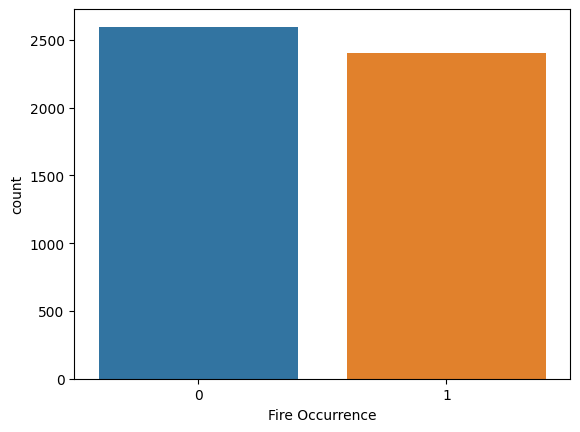

In [ ]:
sns.countplot(x= 'Fire Occurrence', data = data)

<Axes: xlabel='Fire Occurrence'>

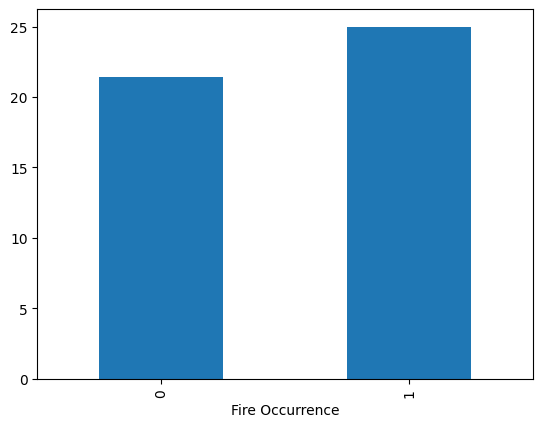

In [ ]:
data.groupby('Fire Occurrence')['Temperature'].mean().plot.bar()

<Axes: xlabel='Fire Occurrence'>

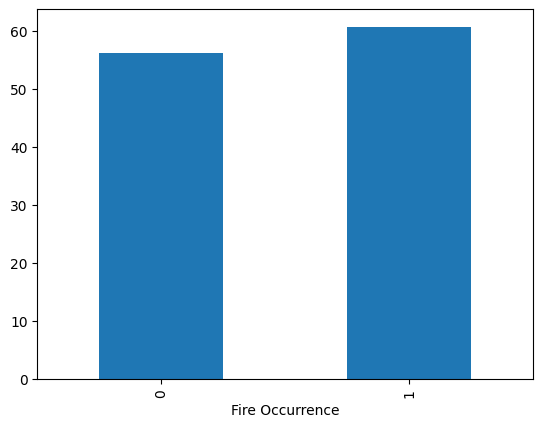

In [ ]:
data.groupby('Fire Occurrence')['Humidity'].mean().plot.bar()

<ipython-input-36-6fdecc055d5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


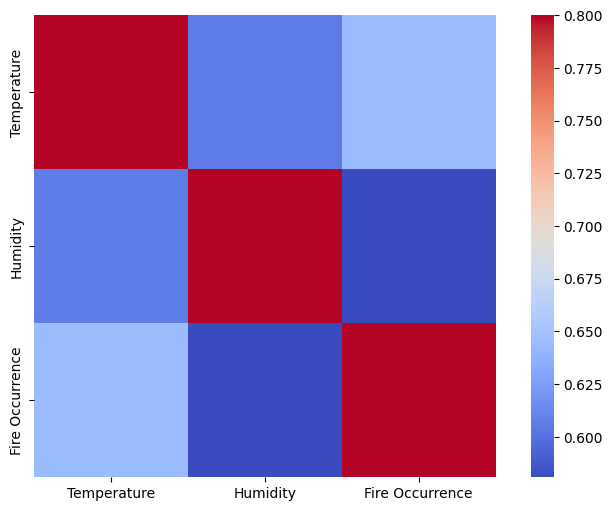

In [ ]:
matrix = data.corr()
ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix, vmax=.8, square=True, cmap="coolwarm")

# DATA PREPROCESSING

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['Fire Occurrence','Area'],axis=1)
y = data['Fire Occurrence']

In [ ]:
X.head(5)

,Temperature,Humidity
0,19,52
1,26,59
2,22,63
3,26,59
4,27,65


In [ ]:
X.shape

(5000, 2)

In [ ]:
y.head(5)

0    1
1    1
2    0
3    1
4    1
Name: Fire Occurrence, dtype: int64

In [ ]:
y.shape

(5000,)

In [ ]:
# Handle missing values (fill with mean )
X = X.fillna(X.mean())

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4000, 2)

In [ ]:
X_test.shape

(1000, 2)

In [ ]:
# Apply feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Convert X_train_scaled back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head(5)

,Temperature,Humidity
0,0.666667,0.538462
1,0.555556,0.692308
2,0.888889,0.846154
3,0.777778,1.000000
4,0.444444,0.846154


# BUILDING AND TRAINING THE MODEL

In [ ]:
# Create and train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the entire training data
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict using the Decision Tree classifier
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy using accuracy_score
test_accuracy = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy:", test_accuracy)

Test Accuracy: 79.9


In [ ]:
# Calculate the classification report for the test data
y_pred = model.predict(X_test_scaled)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for Decision Tree classifier ")
print(class_report)

Classification Report for Decision Tree classifier 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       542
           1       0.77      0.80      0.79       458

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



In [ ]:
RandomForest_model = RandomForestClassifier(random_state=0)
RandomForest_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
# Predict using the RandomForest Classifier
y_pred = RandomForest_model.predict(X_test_scaled)

# Calculate and print the accuracy using accuracy_score
test_accuracy = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy:", test_accuracy)

Test Accuracy: 79.9


In [ ]:
# Calculate the classification report for the test data
y_pred = RandomForest_model.predict(X_test_scaled)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for Random Forest Classifier ")
print(class_report)

Classification Report for Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       542
           1       0.77      0.80      0.79       458

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



In [ ]:
LogisticRegression_model = LogisticRegression(fit_intercept=True, solver='lbfgs')
LogisticRegression_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
# Predict using the Decision Tree classifier
y_pred = LogisticRegression_model.predict(X_test_scaled)

# Calculate and print the accuracy using accuracy_score
test_accuracy = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy:", test_accuracy)

Test Accuracy: 79.7


In [ ]:
# Calculate the classification report for the test data
y_pred = LogisticRegression_model.predict(X_test_scaled)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for LogisticRegression ")
print(class_report)

Classification Report for LogisticRegression 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       542
           1       0.77      0.80      0.78       458

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



## TEST THE MODEL

In [ ]:
# Example new input data (replace with your own values)
new_data = pd.DataFrame({
    'Temperature': [50.0],
    'Humidity': [20.0],
    # Include other features as needed
})

# Scale the new input data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict whether there is a fire
prediction = LogisticRegression_model.predict(new_data_scaled)

# Print the prediction
if prediction[0] == 1:
    print("Fire detected.")
else:
    print("No fire detected.")

Fire detected.


In [ ]:
temp=55
humid=50

temp = np.float64(temp) / 100
humid = np.float64(humid) / 100

prediction = LogisticRegression_model.predict(np.array([[temp,humid]]))[0]

if prediction > 0:
  print('The given area will have fire occurence')
else:
    print('The given area will not have fire occurence')


The given area will have fire occurence


In [ ]:
def plot_decision_boundary(X, y, model, title=""):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

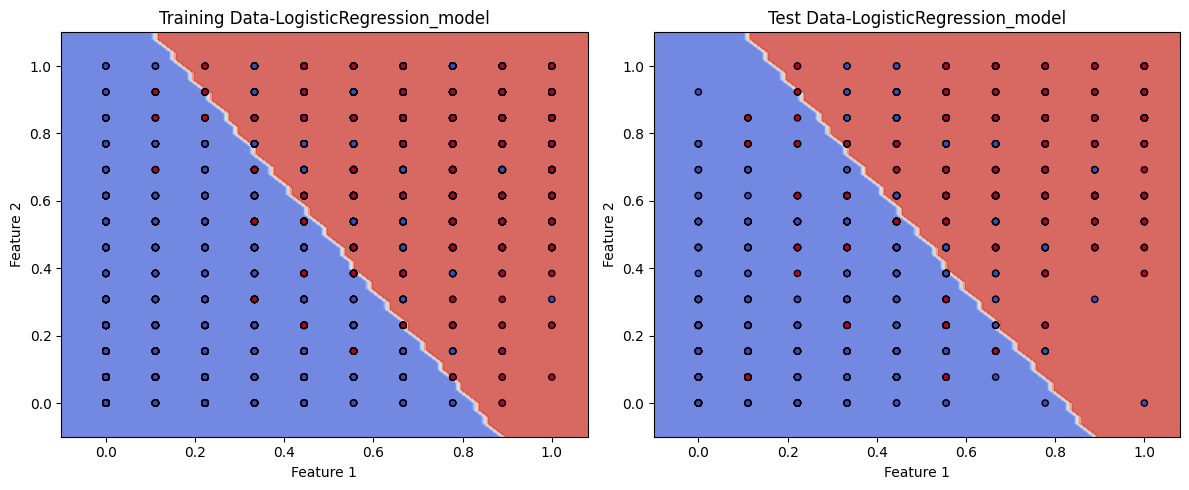

In [ ]:
import matplotlib.pyplot as plt
# Plot decision boundaries for training and test datasets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_train_scaled, y_train, LogisticRegression_model, title="Training Data-LogisticRegression_model")

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_scaled, y_test, LogisticRegression_model, title="Test Data-LogisticRegression_model")

plt.tight_layout()
plt.show()

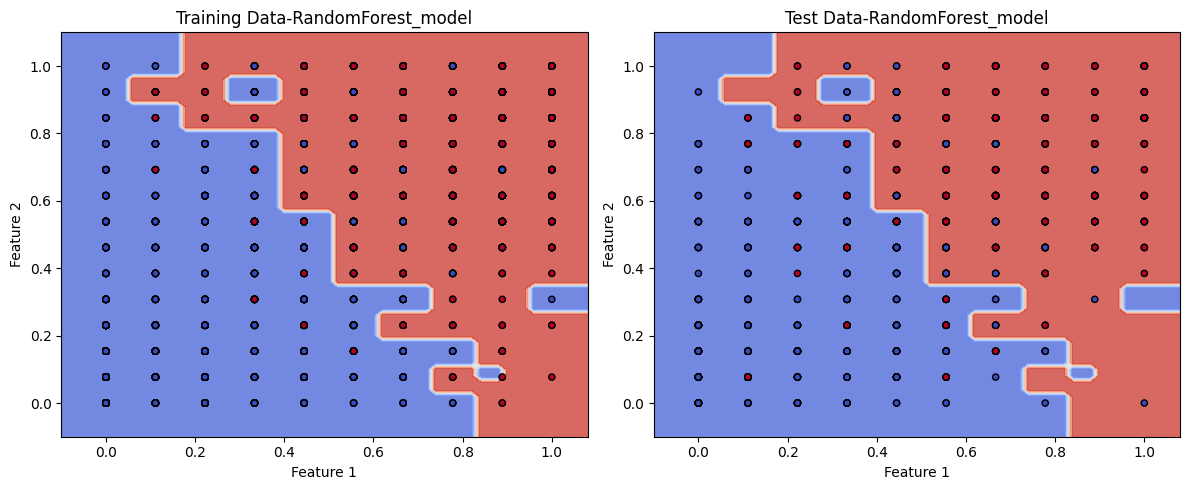

In [ ]:
import matplotlib.pyplot as plt
# Plot decision boundaries for training and test datasets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_train_scaled, y_train, RandomForest_model, title="Training Data-RandomForest_model")

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_scaled, y_test, RandomForest_model, title="Test Data-RandomForest_model")

plt.tight_layout()
plt.show()